## Install Required Packages
We need to install the nmslib and pynndescent packages. These packages can be installed using pip command.

## Introduction
This lab demonstrates a multi-label document classification problem using scikit-learn. The dataset is generated randomly based on the following process:

- Pick the number of labels: n ~ Poisson(n_labels)
- N times, choose a class c: c ~ Multinomial(theta)
- Pick the document length: k ~ Poisson(length)
- K times, choose a word: w ~ Multinomial(theta_c)<br><br>
- In this process, rejection sampling is used to ensure that n is more than 2, and that the document length is never zero.
- Likewise, classes that have already been chosen are rejected.
- The documents that are assigned to both classes are plotted surrounded by two colored circles.

## Import Libraries
In this step, we import the necessary libraries: numpy, matplotlib, make_multilabel_classification from sklearn.datasets, OneVsRestClassifier and SVC from sklearn.multiclass, PCA and CCA from sklearn.decomposition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

## Define Plotting Function
In this step, we define the plot_hyperplane and plot_subfigure functions. plot_hyperplane function is used to get the separating hyperplane while plot_subfigure function is used to plot the subplots.

In [2]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel="linear"))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c="gray", edgecolors=(0, 0, 0))
    plt.scatter(
        X[zero_class, 0],
        X[zero_class, 1],
        s=160,
        edgecolors="b",
        facecolors="none",
        linewidths=2,
        label="Class 1",
    )
    plt.scatter(
        X[one_class, 0],
        X[one_class, 1],
        s=80,
        edgecolors="orange",
        facecolors="none",
        linewidths=2,
        label="Class 2",
    )

    plot_hyperplane(
        classif.estimators_[0], min_x, max_x, "k--", "Boundary\nfor class 1"
    )
    plot_hyperplane(
        classif.estimators_[1], min_x, max_x, "k-.", "Boundary\nfor class 2"
    )
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - 0.5 * max_x, max_x + 0.5 * max_x)
    plt.ylim(min_y - 0.5 * max_y, max_y + 0.5 * max_y)
    if subplot == 2:
        plt.xlabel("First principal component")
        plt.ylabel("Second principal component")
        plt.legend(loc="upper left")

## Generate Dataset
In this step, we generate the dataset using make_multilabel_classification function from sklearn.datasets.

In [3]:
X, Y = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=True, random_state=1
)

## Plot Subplots
In this step, we use plot_subfigure function to plot the subplots.

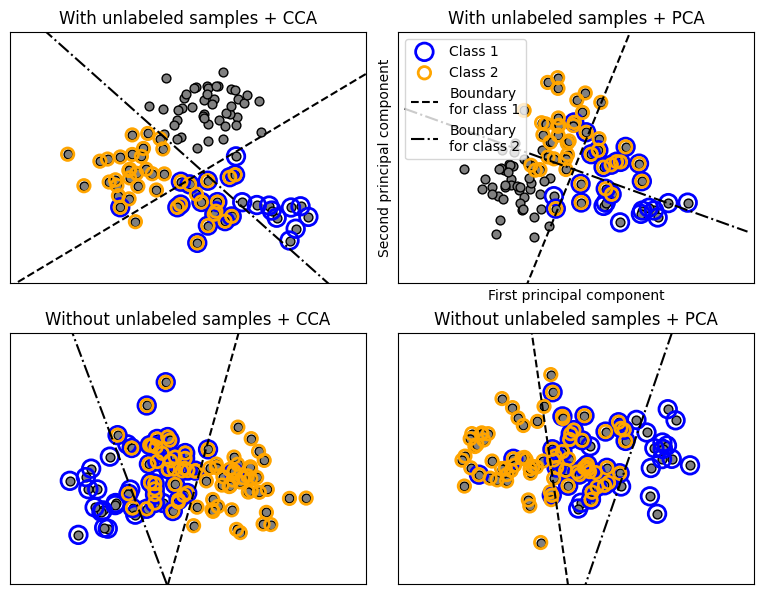

In [4]:
plt.figure(figsize=(8, 6))

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(
    n_classes=2, n_labels=1, allow_unlabeled=False, random_state=1
)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(0.04, 0.02, 0.97, 0.94, 0.09, 0.2)
plt.show()

## Summary
This lab demonstrated a multi-label document classification problem using scikit-learn. We used make_multilabel_classification function to generate the dataset and plot_subfigure function to plot the subplots.